In [132]:
import ROOT
import numpy as np
import time
import math
import matplotlib.pyplot as plt

nr_of_channels = int(3.6 * 1e6)
channels_per_module = int(15*30)
total_modules = int(nr_of_channels/channels_per_module)
threshold = 20


In [140]:
global_counter = 0
low = 0
high = 1000
noise = ROOT.TF1("noise_gauss", "TMath::Gaus(x, 0, 5)", low, high)

#integrate normal dist. to get exact prob. above threshold and multiply with channel nr to get avg. of triggered channels
mean = nr_of_channels * noise.Integral(threshold, high)/noise.Integral(low, high)/2 
print ("Average triggered channels: %f" % mean)
#self._prng = ROOT.TRandom3(time.time_ns())
global_counter += 1
prng = ROOT.TRandom3(int(time.time()) + global_counter)


"""The first return value is the exact number of noise activated channels in the small window and
    the second return value is the estimated number of noise activated channels in the small window. (estimated from large window)
    (both results are in small window, both results are noise above threshold)
    noise_exact, noise_est = noise.generate()"""
# Large time window 25ns
# Small time window 3.125ns

total = prng.Poisson(mean) # number of noise above threshold in large window in this run.
print ("Number of noise above threshold in large W: %f" %total)
narrow_exact = 0
if total <= 5:
    for i in range(total):
        if prng.Uniform(25) < 3.125:
            narrow_exact += 1
else:
    narrow_exact = (np.random.rand(total) < 0.125).sum()  # 3.125/25 = 0.125


noise_per_time = (total - narrow_exact)/(25 - 3.125)
estimate = 3.125 * noise_per_time

print ("Exact number of noise activated channels: %f" % narrow_exact)
print ("Estimated number of noise activated channels: %f" % estimate)




Average triggered channels: 114.016471
Number of noise above threshold in large W: 139.000000
Exact number of noise activated channels: 11.000000
Estimated number of noise activated channels: 18.285714


Landau dist. 1: 329.403465
Landau dist. 2: 118.949071
Landau dist. 3: 144.071569
Landau dist. 4: 56.463511
Landau dist. 5: 278.640019
Landau dist. 6: 585.142136
Landau dist. 7: 206.726909
Landau dist. 8: 196.422489
Landau dist. 9: 141.895962
Landau dist. 10: 149.421850
Signal count: 29
Activated channels: 23


Warning in <TCanvas::Constructor>: Deleting canvas with same name: Signal_Landau


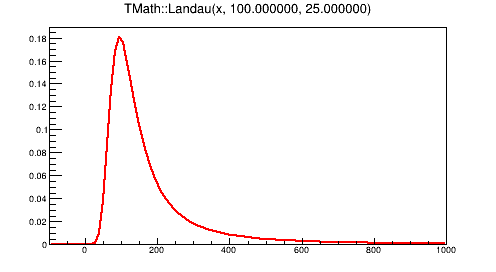

In [129]:
exected_count = 30 #expected number of particles reaching the detector 
real_expected_voltage = 100
guess_expected_voltage = 100
expected_count = 30
global_counter = 0
low = -100
high = 1000
threshold = threshold
expected_voltage = real_expected_voltage
signal_func = ROOT.TF1("sth", "TMath::Landau(x, %f, %f)" % (guess_expected_voltage, guess_expected_voltage/4), low, high)

fraction_above = signal_func.Integral(threshold, high)/signal_func.Integral(low, high)
#self._prng = ROOT.TRandom3(time.time_ns())
global_counter += 1
prng = ROOT.TRandom3(int(time.time()) + global_counter)

c = ROOT.TCanvas ("Signal_Landau", "Landau", 500, 300)
signal_func.Draw()
c.Draw()
"""The paramater is the expected number of particles that reach the detector.
    The first return value is the number of particles that reached the detector and
    the second return value is the number of activated channels.
    signal_real_total, signal_above = signal.generate(30)"""

signal_count = prng.Poisson(expected_count)

for i in range (10):
    print ("Landau dist. %d: %f" %(i+1, prng.Landau(expected_voltage, sigma)))
    
above_threshold_count = 0
sigma = expected_voltage/4
for i in range(signal_count):
    if prng.Landau(expected_voltage, sigma) > threshold: # 1/4 is just the refernce 25/100
        above_threshold_count += 1
#return signal_count, above_threshold_count

print("Signal count: %d" %signal_count)
print("Activated channels: %d" %above_threshold_count)